In [15]:
# Change working directory
os.chdir('/Users/suongsuong/Documents/GitHub/Reactivity-based-metric-of-complexity/Reduction of ketone/')

import pandas as pd
# pd.options.display.max_rows = 10
from chemopy.src.pychem.topology import *
import dbstep.Dbstep as db
import matplotlib.pyplot as plt

In [3]:
def calculate_Sterimol_fromXYZ(Reaction_ID, atom1_idx, atom2_idx, folder_path):
    file = folder_path + str(Reaction_ID) + '.xyz'
    if file:
        mol = db.dbstep(file,atom1=atom1_idx,atom2=atom2_idx,commandline=True,verbose=True,sterimol=True, volume = False, measure='classic') 
        #
        L = mol.L
        Bmin = mol.Bmin
        Bmax = mol.Bmax
        return [L, Bmin, Bmax]
    else:
        return [None,None,None]

def calculate_PBV(Reaction_ID, atom1_idx, atom2_idx, folder_path):
    file = folder_path + str(Reaction_ID) + '.xyz'
    if file:
        mol = db.dbstep(file,atom1=atom1_idx,atom2=atom2_idx,commandline=True,verbose=True,sterimol=False, volume = True) 
        PBV = mol.bur_vol
        return PBV
    else:
        return None

-------
## <span style="color:blue"> Import data </span>

In [4]:
df_have3D = pd.read_excel('ReductionKetone_have3D.xlsx')
df_have3D.shape

(906, 27)

-------
## <span style="color:blue"> Sterimol </span>

In [50]:
get_sterimol = df_have3D.copy()
# set atom1 = Oxygen, atome 2 = Carbon
get_sterimol['Sterimol parameters'] = get_sterimol.apply(lambda x: calculate_Sterimol_fromXYZ(x['Reaction ID'], x['O_idx'], x['C_idx'], '3D_structures/'), axis=1)


   3D_structures/38244374.xyz will be analyzed using the vdw surface
   Defining the molecule with Bondi atomic radii scaled by 1.0

   Translating molecule by [ 2.22856  -0.84787  -1.577679] to set O17 at the origin
   Rotating molecule about x-axis -146.24 degrees.
   Rotating molecule about y-axis -15.61 degrees.

   Molecule is bounded by the region X:[-3.900 to  7.100] Y:[-5.900 to  5.450] Z:[-3.850 to  7.600]

   Steric parameters will be generated in classic mode for 3D_structures/38244374.xyz

   3D_structures/38244374.xyz / Bmin:  2.88 / Bmax:  7.14 / L:  7.54

   3D_structures/46506389.xyz will be analyzed using the vdw surface
   Defining the molecule with Bondi atomic radii scaled by 1.0

   Translating molecule by [2.572301 2.44473  2.095789] to set O1 at the origin
   Rotating molecule about x-axis 48.48 degrees.
   Rotating molecule about y-axis -21.45 degrees.

   Molecule is bounded by the region X:[-3.850 to  8.650] Y:[-3.850 to  7.000] Z:[-3.850 to  9.700]

   Steri

In [61]:
get_sterimol['Sterimol_L'] = get_sterimol['Sterimol parameters'].apply(lambda x: x[0])
get_sterimol['Sterimol_Bmin'] = get_sterimol['Sterimol parameters'].apply(lambda x: x[1])
get_sterimol['Sterimol_Bmax'] = get_sterimol['Sterimol parameters'].apply(lambda x: x[2])
get_sterimol


,Reaction,Reactant,...,Sterimol_Bmin,Sterimol_Bmax
0,COC(OC)C1=CC=CC=C1C(CC#N)C(=O)C1=CC=CC=C1>>COC...,(±)-3-[2-(dimethoxymethyl)phenyl]-4-oxo-4-phen...,...,2.877858,7.139182
1,BrC1=CC=C(C=C1)C(=O)CN1C=C(N=N1)C1=CC=CC=C1>>O...,"1-(4-bromophenyl)-2-(4-phenyl-1H-1,2,3-triazol...",...,1.857705,8.595138
2,O=C(CN1C=C(N=N1)C1=CC=CC=C1)C1=CC=CC=C1>>OC(CN...,"1-phenyl-2-(4-phenyl-[1,2,3]triazole-1-yl)etha...",...,1.836061,8.631040
3,ClC1=CC=C(C=C1)C(=O)CN1C=C(N=N1)C1=CC=CC=C1>>O...,"1-(4-chlorophenyl)-2-(4-phenyl-1H-1,2,3-triazo...",...,2.160033,9.422432
4,COC1=CC=C(C=C1)C(=O)CN1C=C(N=N1)C1=CC=CC=C1>>C...,"1-(4-methoxyphenyl)-2-(4-phenyl-1H-1,2,3-triaz...",...,1.922295,10.194644
...,...,...,...,...,...
901,O=C(CN=N#N)C1=CC=CC=C1>>OC(CN=N#N)C1=CC=CC=C1,2-azido-1-phenylethan-1-one,...,2.130446,5.810364
902,CC(C)=CCC(=O)C1=CC=CC=C1>>CC(C)=CCC(O)C1=CC=CC=C1,4-methyl-1-phenyl-3-penten-1-one,...,1.811139,6.192245
903,CC(=O)C1=CC=C(F)C=C1>>CC(O)C1=CC=C(F)C=C1,1-(4-Fluorophenyl)ethanone,...,1.923251,6.408712
904,COC(=O)C(C)C(=O)CCC=C.COC(=O)C(C)C(=O)CCC=C>>C...,methyl 2-methyl-3-oxo-hept-6-enoate,...,2.546982,6.104389


In [ ]:
# # USE THIS CODE, combinded with view_reactionScheme() with mapping, to check if the right index was pull out
# df = get_sterimol[get_sterimol['Reaction ID'] == 34428968]
# for idx, row in df.iterrows(): 
#     smiles_map = row['Reactant smiles map']
#     reactant_mol = Chem.MolFromSmiles(smiles_map)

#     C_idx = row['C_idx'] - 1 # - 1 because the idx in the df is the order of atom counting from 1
#     O_idx = row['O_idx'] - 1
#     atom_C = reactant_mol.GetAtomWithIdx(C_idx)
#     atom_O = reactant_mol.GetAtomWithIdx(O_idx)
#     print('this supposed to be C:', atom_C.GetSymbol(), atom_C.GetAtomMapNum())
#     print('this supposed to be O:', atom_O.GetSymbol(), atom_O.GetAtomMapNum())

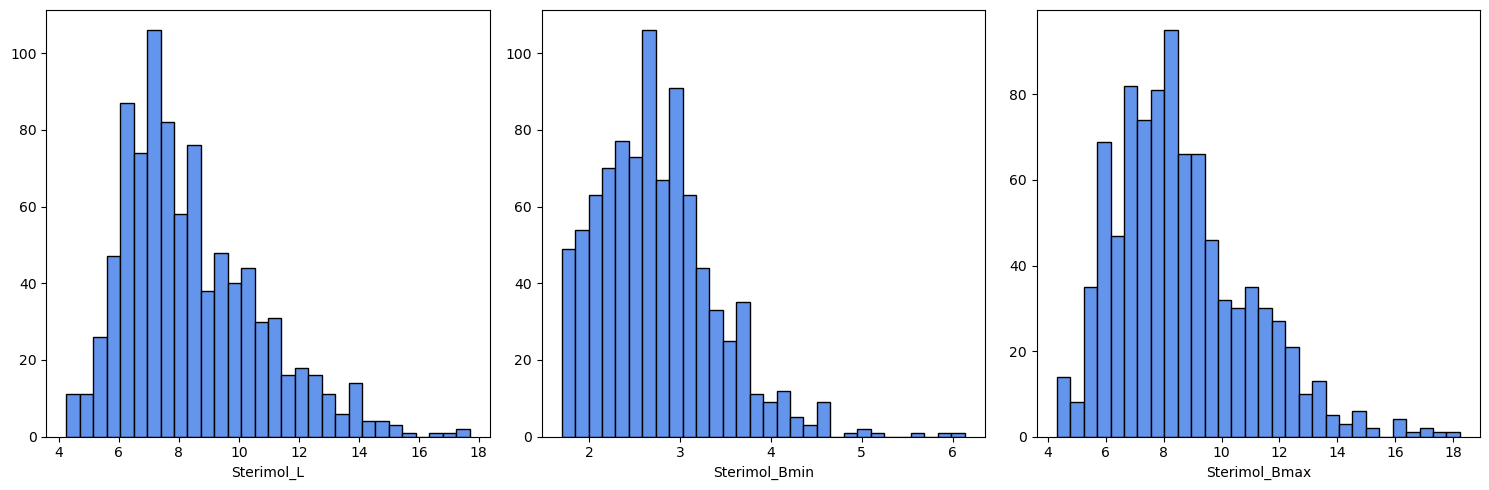

In [63]:
# Grid size
ncols = 3  
nrows = 1

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
# axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier

# Plot Sterimol paras
df = get_sterimol[['Sterimol_L','Sterimol_Bmin', 'Sterimol_Bmax']]

for i, col in enumerate(df.columns):
    ax = axes[i]
    ax.hist(df[col], bins=30, color='cornflowerblue', edgecolor='black')
    ax.set_xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

-------
## <span style="color:blue"> PBV </span>

In [66]:
get_PBV = get_sterimol.copy()
# get_PBV = get_PBV.head(100)
#this time set atom 1 is the Carbonyl-Carbon
get_PBV['PBV'] = get_PBV.apply(lambda x: calculate_PBV(x['Reaction ID'], x['C_idx'], x['O_idx'], '3D_structures/'), axis=1)


   3D_structures/38244374.xyz will be analyzed using the vdw surface
   Defining the molecule with Bondi atomic radii scaled by 1.0

   Translating molecule by [ 1.888987 -0.172323 -0.567205] to set C16 at the origin

   Molecule is bounded by the region X:[-3.850 to  6.600] Y:[-6.150 to  4.950] Z:[-5.150 to  3.850]

   Using a Cartesian grid-spacing of 0.0500 Angstrom.
   There are 8476230 grid points.
   There are 2237021 occupied grid points.
   Molecular volume is 279.6276 Ang^3

   Steric parameters will be generated in grid mode for 3D_structures/38244374.xyz

      R/Å     %V_Bur     %S_Bur
   RADIUS:  3.50, VFREE:   71.45, VBURIED:  108.09, VTOTAL:  179.54, VEXACT:  179.59, NVOXEL: 1436307, %V_Bur:   60.21%,  Tot/Ex:    0.03%
     3.50      60.21       0.00

   3D_structures/46506389.xyz will be analyzed using the vdw surface
   Defining the molecule with Bondi atomic radii scaled by 1.0

   Translating molecule by [2.111105 1.565719 1.317482] to set C2 at the origin

   Molec

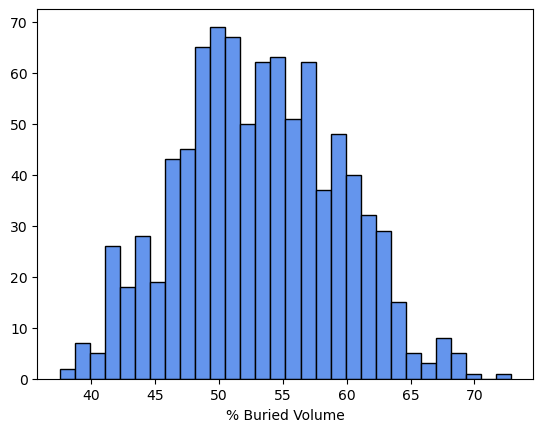

In [69]:
plt.hist(get_PBV['PBV'], bins=30, color='cornflowerblue', edgecolor='black')
plt.xlabel("% Buried Volume")
plt.show()

In [70]:
get_PBV.to_excel('ReductionKetone_get_Sterimol_PBV.xlsx', index = False)